* Recurrent Neural Networks (RNNs) differ from regular neural networks in how they process information. While standard neural networks pass information in one direction i.e. from input to output, RNNs feed information back into the network at each step.

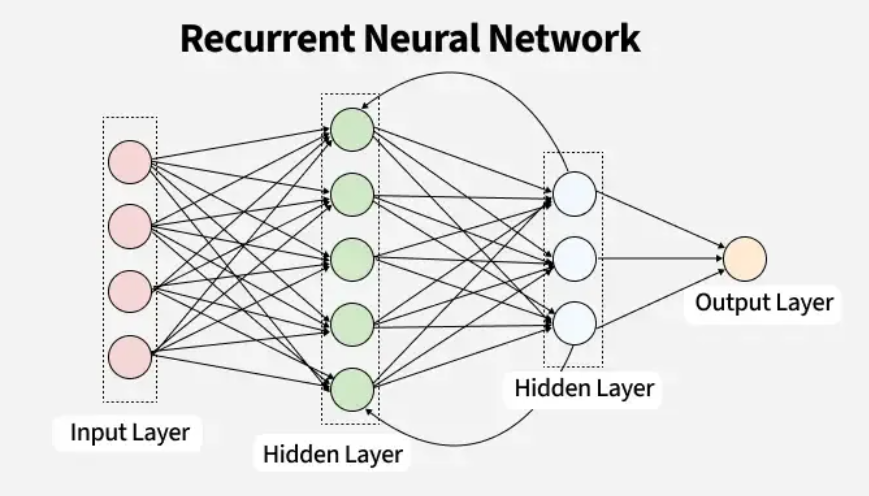

---

#### Lets understand RNN with a example:

Imagine reading a sentence and you try to predict the next word, you don’t rely only on the current word but also remember the words that came before. RNNs work similarly by “remembering” past information and passing the output from one step as input to the next i.e it considers all the earlier words to choose the most likely next word. This memory of previous steps helps the network understand context and make better predictions.

---

## Key Components of RNNs
There are mainly two components of RNNs that we will discuss.

#### 1. Recurrent Neurons

The fundamental processing unit in RNN is a Recurrent Unit. They hold a hidden state that maintains information about previous inputs in a sequence. Recurrent units can "remember" information from prior steps by feeding back their hidden state, allowing them to capture dependencies across time.
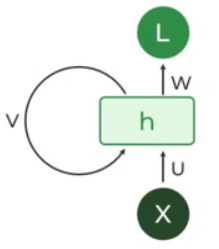

#### 2. RNN Unfolding

1. RNN unfolding or unrolling is the process of expanding the recurrent structure over time steps. During unfolding each step of the sequence is represented as a separate layer in a series illustrating how information flows across each time step.

2. This unrolling enables backpropagation through time (BPTT) a learning process where errors are propagated across time steps to adjust the network’s weights enhancing the RNN’s ability to learn dependencies within sequential data.

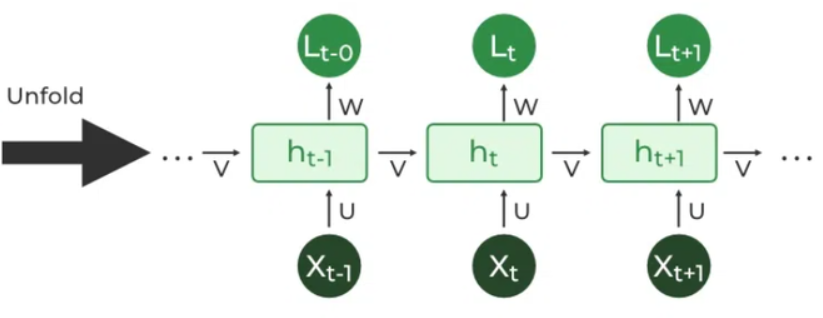

---

## How does RNN work?
At each time step RNNs process units with a fixed activation function. These units have an internal hidden state that acts as memory that retains information from previous time steps. This memory allows the network to store past knowledge and adapt based on new inputs.

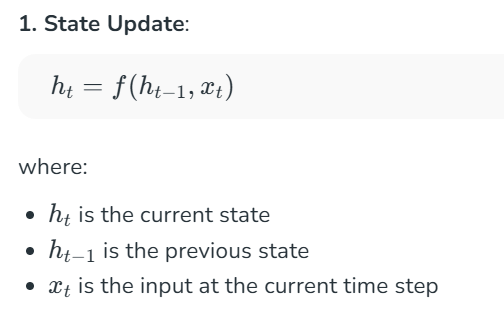
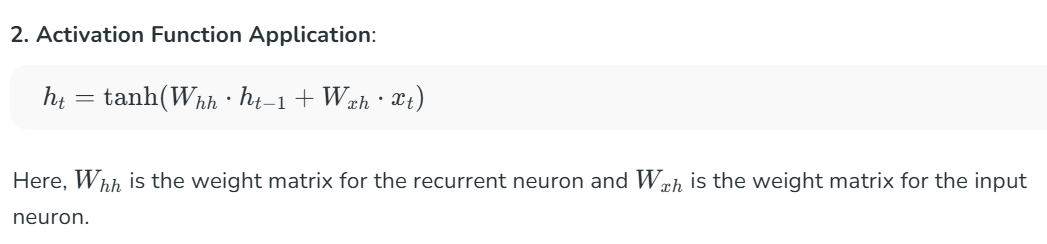
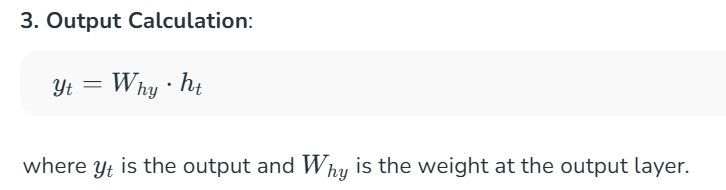

* These parameters are updated using backpropagation. However, since RNN works on sequential data here we use an updated backpropagation which is known as backpropagation through time. 

---

## Backpropagation Through Time (BPTT) in RNNs

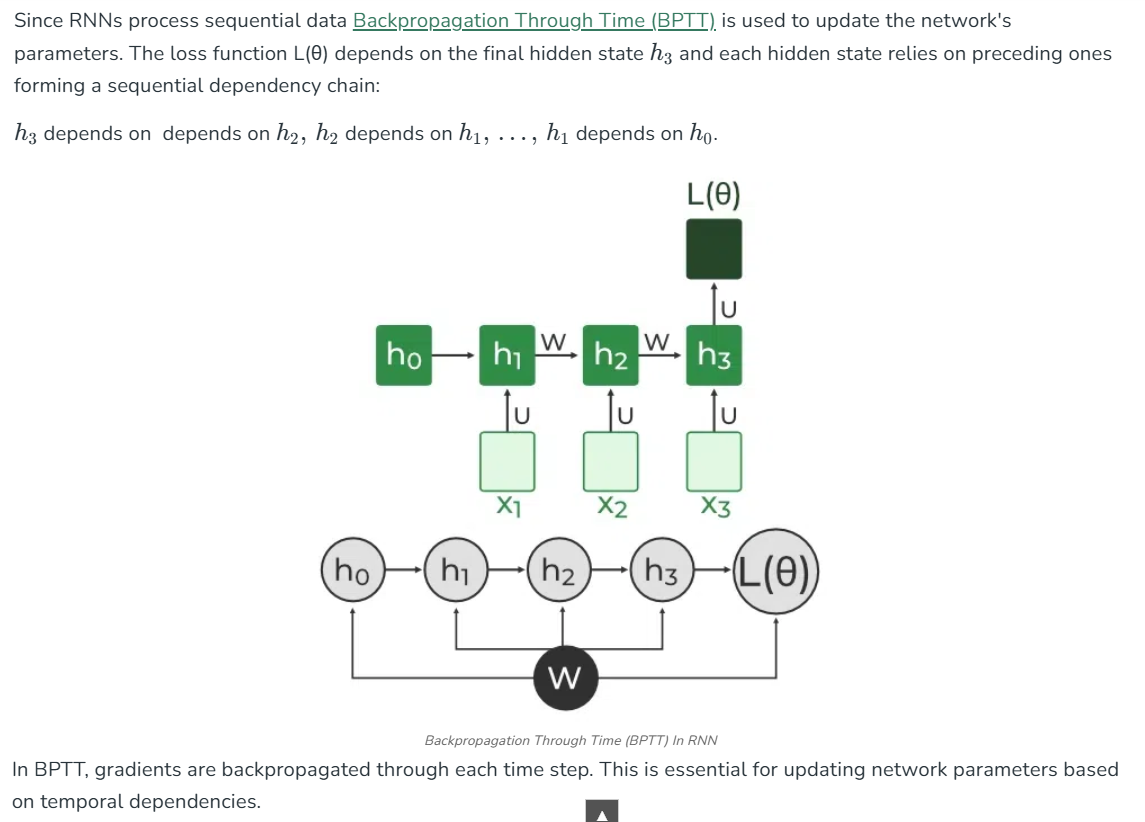
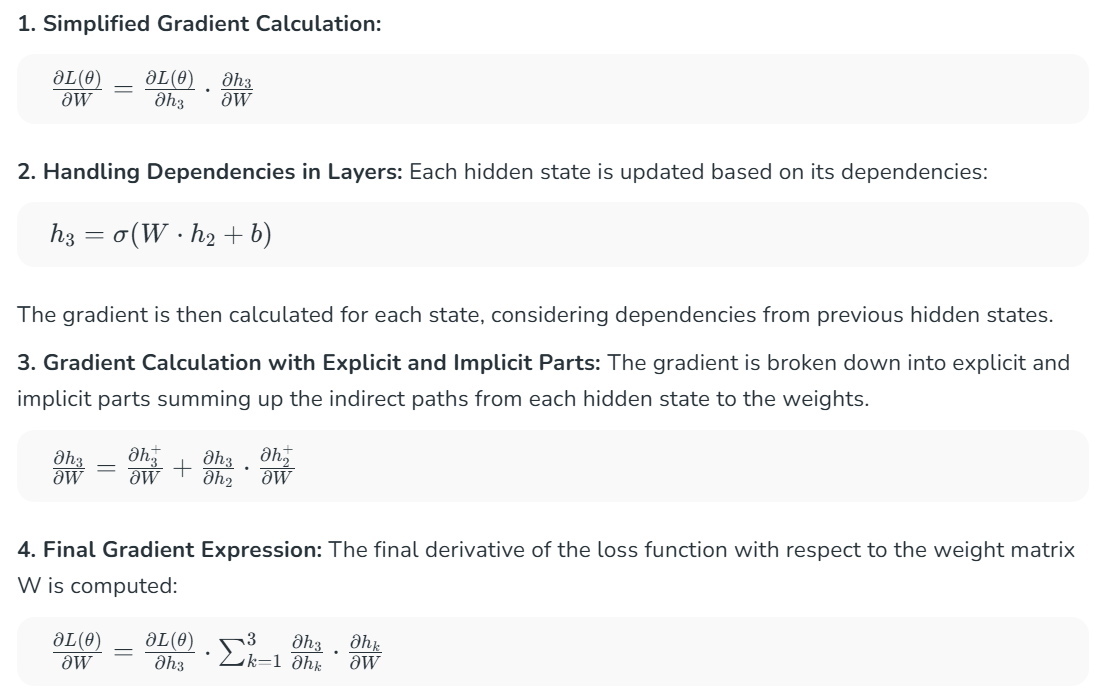

---

## Types Of Recurrent Neural Networks
* There are four types of RNNs based on the number of inputs and outputs in the network:
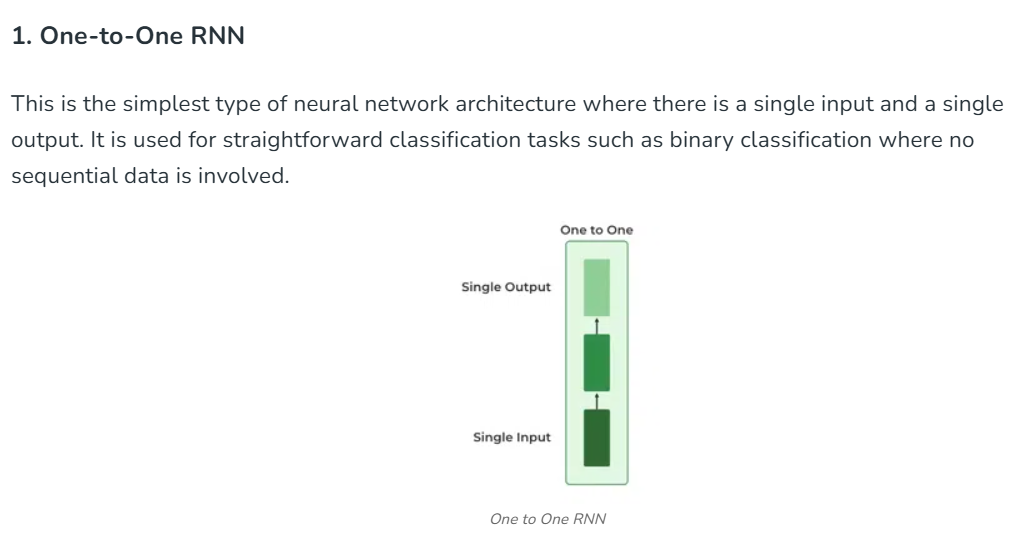
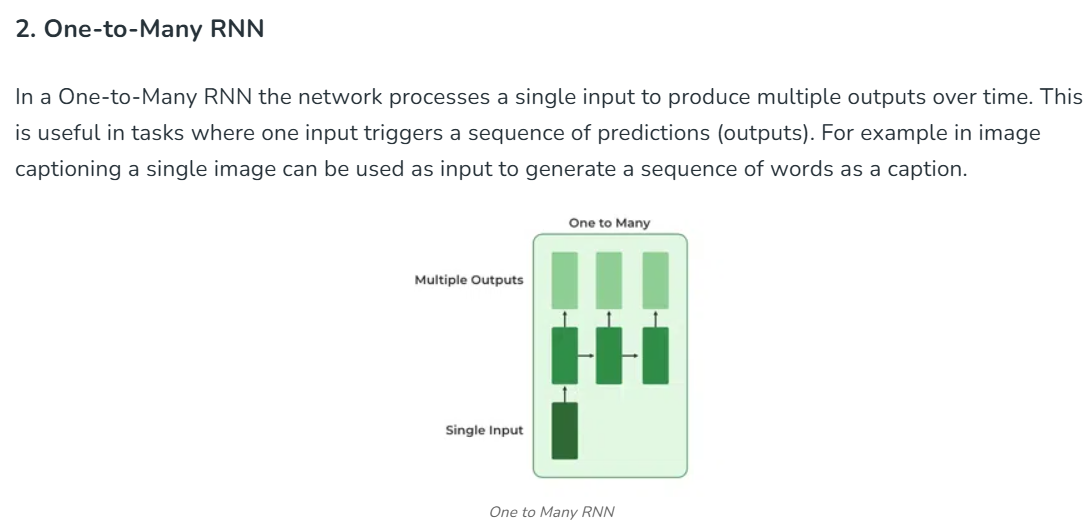
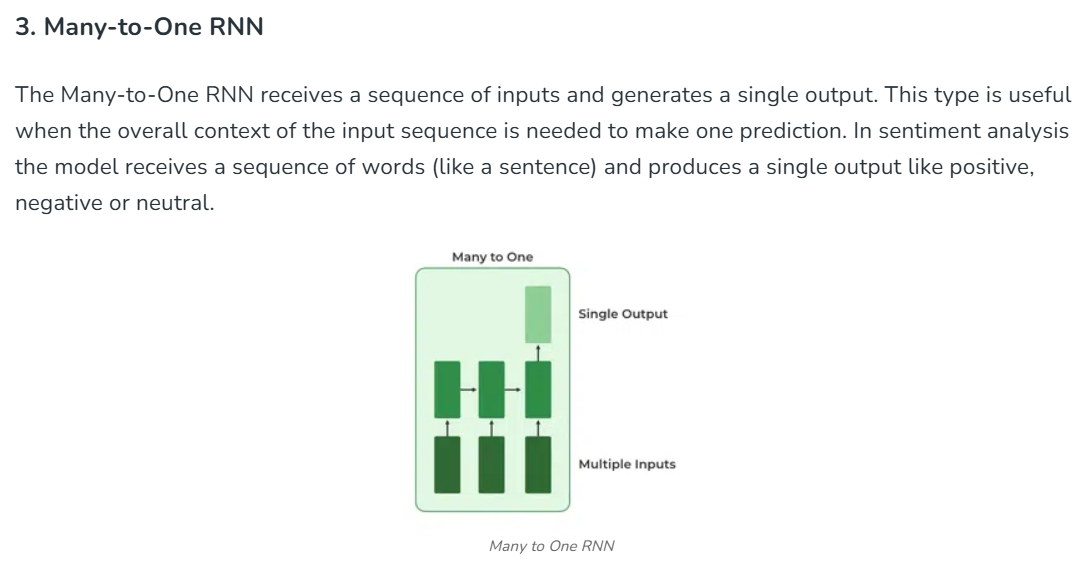
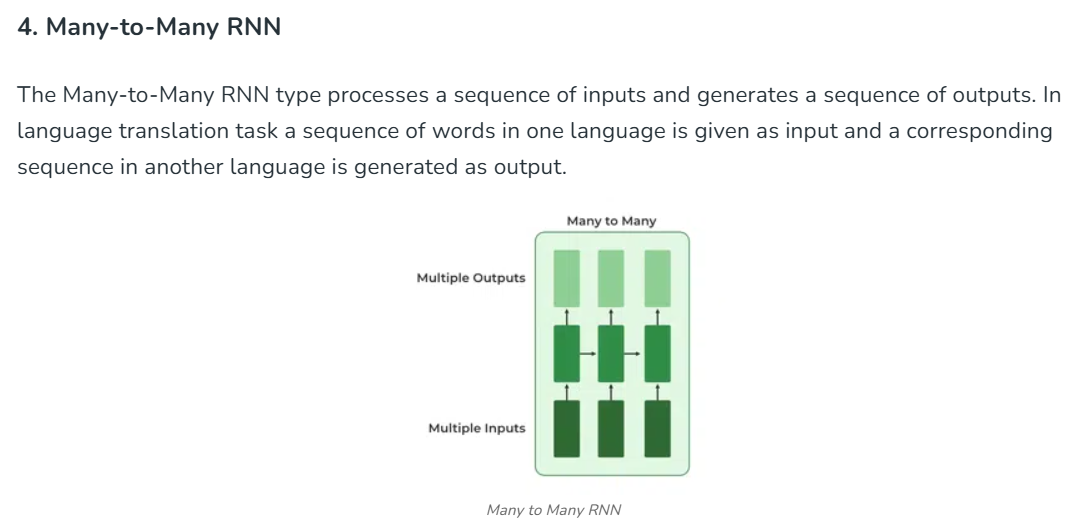

---

# Implementing a Text Generator Using Recurrent Neural Networks (RNNs)
In this section, we create a character-based text generator using Recurrent Neural Network (RNN) in TensorFlow and Keras. We'll implement an RNN that learns patterns from a text sequence to generate new text character-by-character.

In [ ]:
# 1. Importing Necessary Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# 2. Defining the Input Text and Prepare Character Set
# We define the input text and identify unique characters in the text which we’ll encode for our model.
text = "This is GeeksforGeeks a software training institute"
chars = sorted(list(set(text)))
char_to_index = {char: i for i, char in enumerate(chars)}
index_to_char = {i: char for i, char in enumerate(chars)}

# 3. Creating Sequences and Labels
# To train the RNN, we need sequences of fixed length (seq_length) and the character following each sequence as the label.
seq_length = 3
sequences = []
labels = []

for i in range(len(text) - seq_length):
    seq = text[i:i + seq_length]
    label = text[i + seq_length]
    sequences.append([char_to_index[char] for char in seq])
    labels.append(char_to_index[label])

X = np.array(sequences)
y = np.array(labels)

# 4. Converting Sequences and Labels to One-Hot Encoding
# For training we convert X and y into one-hot encoded tensors.
X_one_hot = tf.one_hot(X, len(chars))
y_one_hot = tf.one_hot(y, len(chars))

# 5. Building the RNN Model
# We create a simple RNN model with a hidden layer of 50 units and a Dense output layer with softmax activation.
model = Sequential()
model.add(SimpleRNN(50, input_shape=(seq_length, len(chars)), activation='relu'))
model.add(Dense(len(chars), activation='softmax'))

# 6. Compiling and Training the Model
# We compile the model using the categorical_crossentropy loss and train it for 100 epochs.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_one_hot, y_one_hot, epochs=100)

# 7. Generating New Text Using the Trained Model
# After training we use a starting sequence to generate new text character by character.
start_seq = "This is G"
generated_text = start_seq

for i in range(50):
    x = np.array([[char_to_index[char] for char in generated_text[-seq_length:]]])
    x_one_hot = tf.one_hot(x, len(chars))
    prediction = model.predict(x_one_hot)
    next_index = np.argmax(prediction)
    next_char = index_to_char[next_index]
    generated_text += next_char

print("Generated Text:")
print(generated_text)

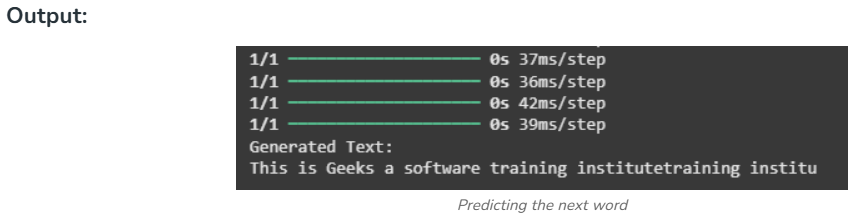

---

# Limitations
While RNNs excel at handling sequential data they face two main training challenges i.e "vanishing gradient" and "exploding gradient" problem

---

# Variants of Recurrent Neural Networks (RNNs)
1. Bidirectional RNNs
2. Long Short-Term Memory Networks (LSTMs)
3. Gated Recurrent Units (GRUs)

---

# Bidirectional RNN

#### In traditional RNNs face challenges such as the vanishing gradient problem where gradients become too small during backpropagation making training difficult. To address this issue advanced RNN architectures like the Bidirectional Recurrent Neural Network (BRNN) have been developed.

---

# Overview of Bidirectional Recurrent Neural Networks (BRNNs)

1. A Bidirectional Recurrent Neural Network (BRNN) is an extension of the traditional RNN that processes sequential data in both forward and backward directions. This allows the network to utilize both past and future context when making predictions providing a more comprehensive understanding of the sequence.

2. Like a traditional RNN, a BRNN moves forward through the sequence, updating the hidden state based on the current input and the prior hidden state at each time step. The key difference is that a BRNN also has a backward hidden layer which processes the sequence in reverse, updating the hidden state based on the current input and the hidden state of the next time step.

3. Compared to unidirectional RNNs BRNNs improve accuracy by considering both the past and future context. This is because the two hidden layers i.e forward and backward complement each other and predictions are made using the combined outputs of both layers.

4. Example:
          Consider the sentence: "I like apple. It is very healthy."

          In a traditional unidirectional RNN the network might struggle to understand whether "apple" refers to the fruit or the company based on the first sentence. However a BRNN would have no such issue. By processing the sentence in both directions, it can easily understand that "apple" refers to the fruit, thanks to the future context provided by the second sentence ("It is very healthy.").

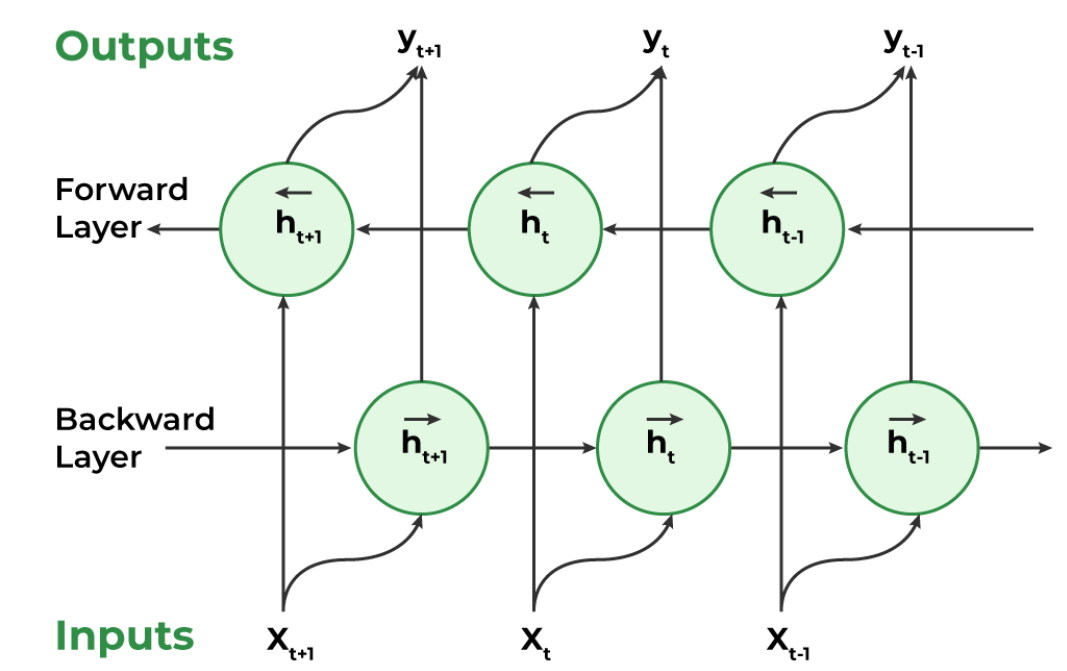

---

# Implementation of Bi-directional Recurrent Neural Network
Here’s a simple implementation of a Bidirectional RNN using Keras and TensorFlow for sentiment analysis on the IMDb dataset available in keras:

## 1. Loading and Preprocessing Data
We first load the IMDb dataset and preprocess it by padding the sequences to ensure uniform length.

* warnings.filterwarnings('ignore') suppresses any warnings during execution.
* imdb.load_data(num_words=features) loads the IMDb dataset, considering only the top 2000 most frequent words.
* pad_sequences(X_train, maxlen=max_len) and pad_sequences(X_test, maxlen=max_len) pad the training and test sequences to a maximum length of 50 words ensuring consistent input size.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences

features = 2000  # Number of most frequent words to consider
max_len = 50     # Maximum length of each sequence

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=features)

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# 2. Defining the Model Architecture
We define a Bidirectional Recurrent Neural Network model using Keras. The model uses an embedding layer with 128 dimensions, a Bidirectional SimpleRNN layer with 64 hidden units and a dense output layer with a sigmoid activation for binary classification.

* Embedding() layer maps input features to dense vectors of size embedding (128), with an input length of len.
* Bidirectional(SimpleRNN(hidden)) adds a bidirectional RNN layer with hidden (64) units.
* Dense(1, activation='sigmoid') adds a dense output layer with 1 unit and a sigmoid activation for binary classification.
* model.compile() configures the model with Adam optimizer, binary cross-entropy loss and accuracy as the evaluation metric.

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, SimpleRNN, Dense

embedding_dim = 128  
hidden_units = 64    

model = Sequential()

model.add(Embedding(features, embedding_dim, input_length=max_len))

model.add(Bidirectional(SimpleRNN(hidden_units)))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 3. Training the Model
As we have compiled our model successfully and the data pipeline is also ready so, we can move forward toward the process of training our BRNN.

* batch_size=32 defines how many samples are processed together in one iteration.
* epochs=5 sets the number of times the model will train on the entire dataset.
* model.fit() trains the model on the training data and evaluates it using the provided validation data.

In [ ]:
batch_size = 32
epochs = 5

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test))

# 4. Evaluating the Model
Now as we have our model ready let’s evaluate its performance on the validation data using different evaluation metrics. For this purpose we will first predict the class for the validation data using this model and then compare the output with the true labels.

* model.evaluate(X_test, y_test) evaluates the model's performance on the test data (X_test, y_test), returning the loss and accuracy.

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

print('Test accuracy:', accuracy)

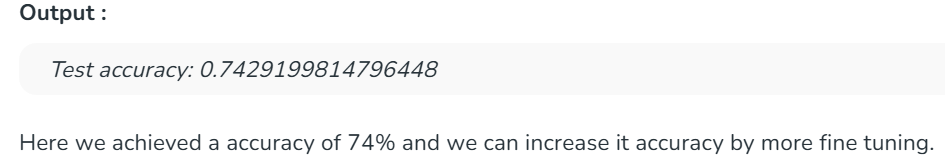

# 5. Predict on Test Data
We will use the model to predict on the test data and compare the predictions with the true labels.

* model.predict(X_test) generates predictions for the test data.
* y_pred = (y_pred > 0.5) converts the predicted probabilities into binary values (0 or 1) based on a threshold of 0.5.
* classification_report(y_test, y_pred, target_names=['Negative', 'Positive']) generates and prints a classification report including precision, recall, f1-score and support for the negative and positive classes.

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

y_pred = (y_pred > 0.5)

print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

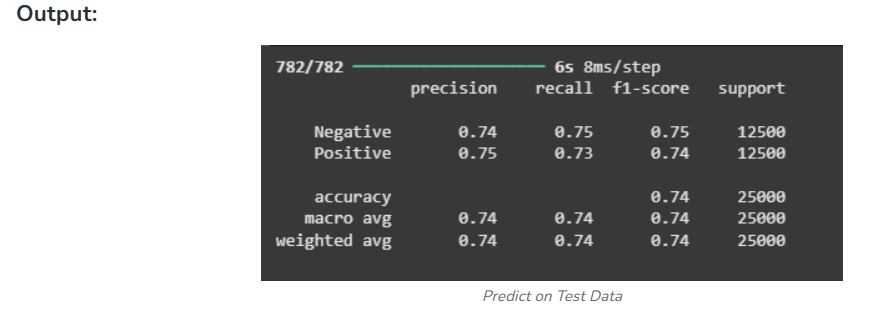

---

# LSTM

### Introduction to LSTM

1. RNN fails to store information for a longer period of time. At times, a reference to certain information stored quite a long time ago is required to predict the current output. But RNNs are absolutely incapable of handling such “long-term dependencies”.

2. There is no finer control over which part of the context needs to be carried forward and how much of the past needs to be ‘forgotten’. 

3. Other issues with RNNs are exploding and vanishing gradients (explained later) which occur during the training process of a network through backtracking. Thus, Long Short-Term Memory (LSTM) was brought into the picture.

### Structure of LSTM

1. The basic difference between the architectures of RNNs and LSTMs is that the hidden layer of LSTM is a gated unit or gated cell.

2. It consists of "four" layers that interact with one another

3. But RNNs which have got only a "single" neural net layer of "tanh"

4. LSTMs comprise "three logistic sigmoid gates" and "one tanh" layer.

5. They determine which part of the information will be needed by the next cell and which part is to be discarded.

6. The output is usually in the range of 0-1 where ‘0’ means ‘reject all’ and ‘1’ means ‘include all’.  

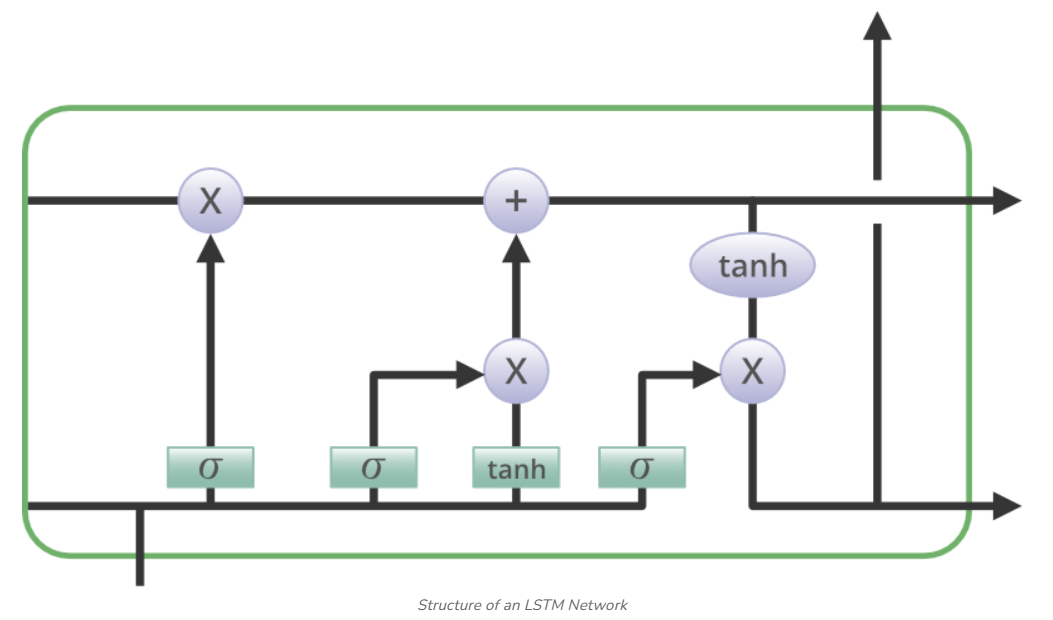

7. Information is retained by the cells and the memory manipulations are done by the gates.

8. There are three gates which are explained below:

#### 1. Forget Gate

* The information that is no longer useful in the cell state is removed with the forget gate. Two inputs x_t (input at the particular time) and h_t-1 (previous cell output) are fed to the gate and multiplied with weight matrices followed by the addition of bias. The resultant is passed through an activation function which gives a binary output. If for a particular cell state, the output is 0, the piece of information is forgotten and for output 1, the information is retained for future use.

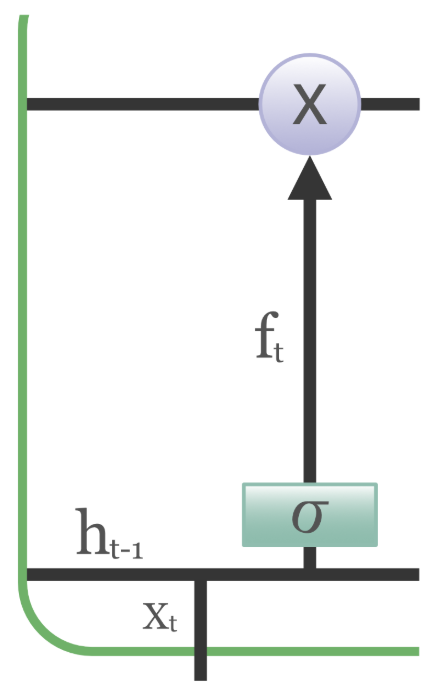

#### 2. Input gate

* The addition of useful information to the cell state is done by the input gate. First, the information is regulated using the sigmoid function and filter the values to be remembered similar to the forget gate using inputs h_t-1 and x_t. Then, a vector is created using the tanh function that gives an output from -1 to +1, which contains all the possible values from h_t-1 and x_t. At last, the values of the vector and the regulated values are multiplied to obtain useful information.

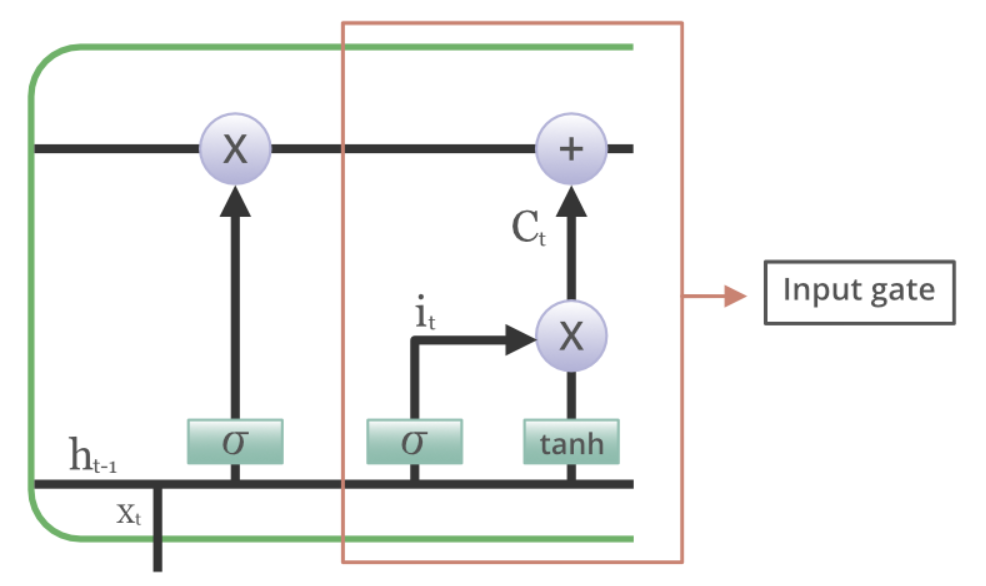

#### 3. Output gate

* The task of extracting useful information from the current cell state to be presented as output is done by the output gate. First, a vector is generated by applying the tanh function on the cell. Then, the information is regulated using the sigmoid function and filtered by the values to be remembered using inputs h_t-1 and x_t. At last, the values of the vector and the regulated values are multiplied to be sent as an output and input to the next cell.

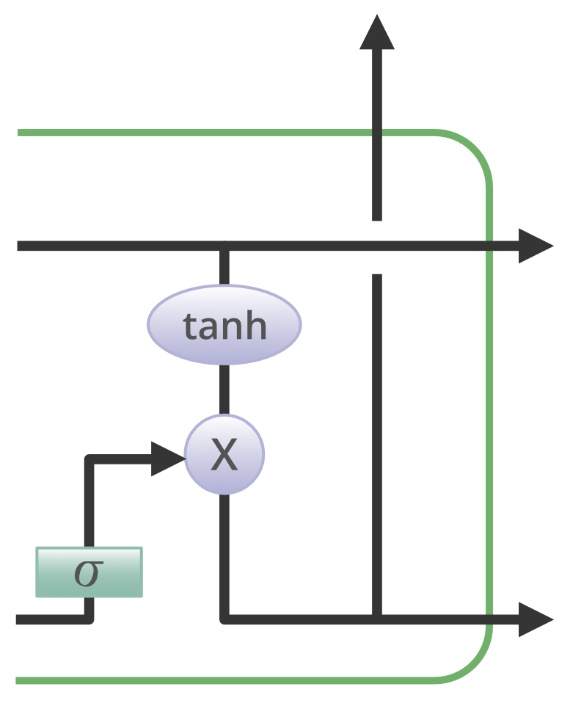

---

# GRU

1.  traditional RNNs struggle with capturing long-term dependencies due to the vanishing gradient problem architectures like Long Short-Term Memory (LSTM)

2. However LSTMs are very complex structure with higher computational cost. 

3. To overcome this Gated Recurrent Unit (GRU) where introduced which uses LSTM architecture by merging its gating mechanisms

### What are Gated Recurrent Units (GRU) ?

1. The core idea behind GRUs is to use gating mechanisms to selectively update the hidden state at each time step allowing them to remember important information while discarding irrelevant details.

2. GRUs aim to simplify the LSTM architecture by merging some of its components and focusing on just "two main gates": the "update gate" and the "reset gate".

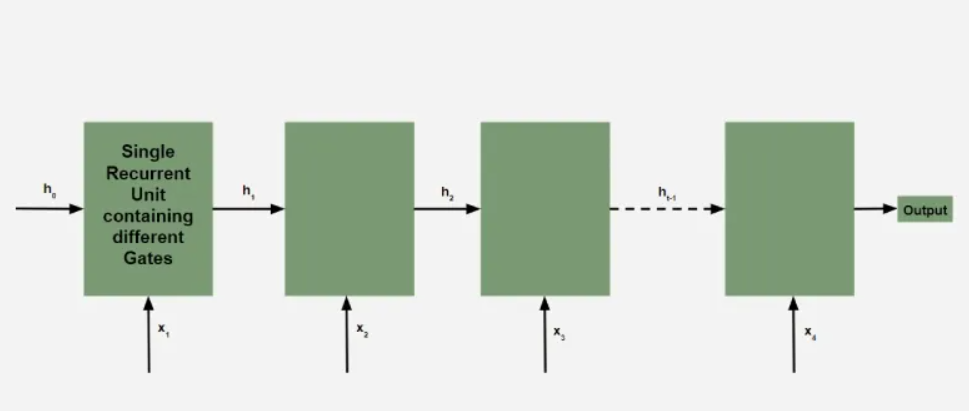

#### The GRU consists of two main gates:

1. Update Gate (Zt) : This gate decides how much information from previous hidden state should be retained for the next time step.
2. Reset Gate (Rt) : This gate determines how much of the past hidden state should be forgotten.

#### Equations for GRU Operations

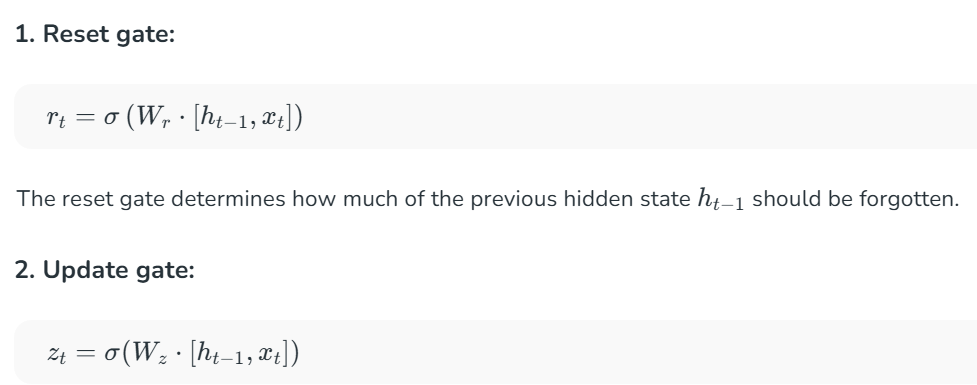
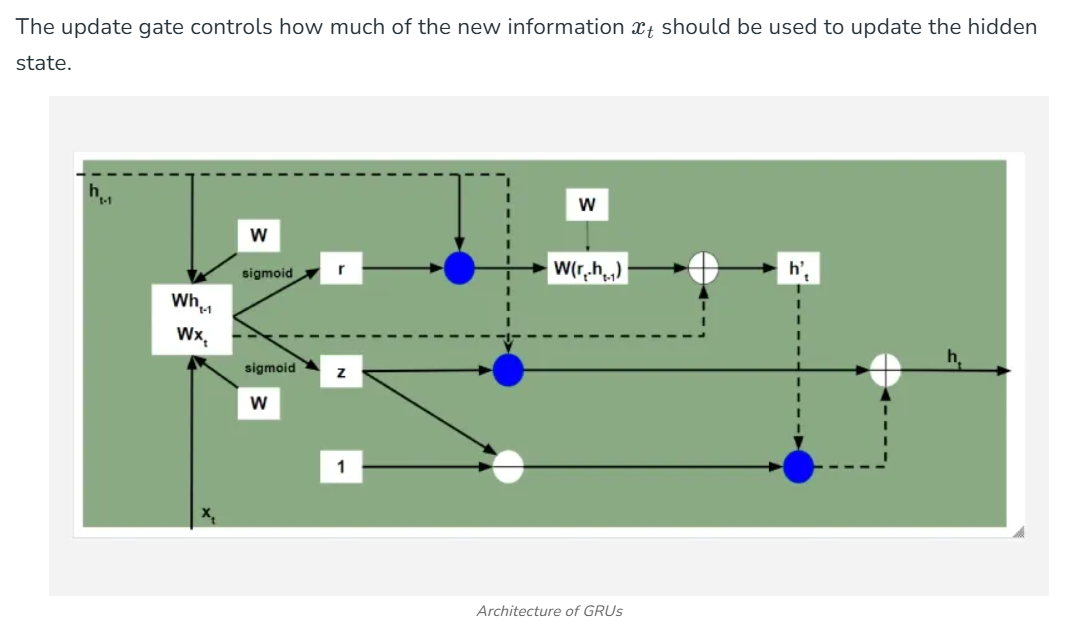
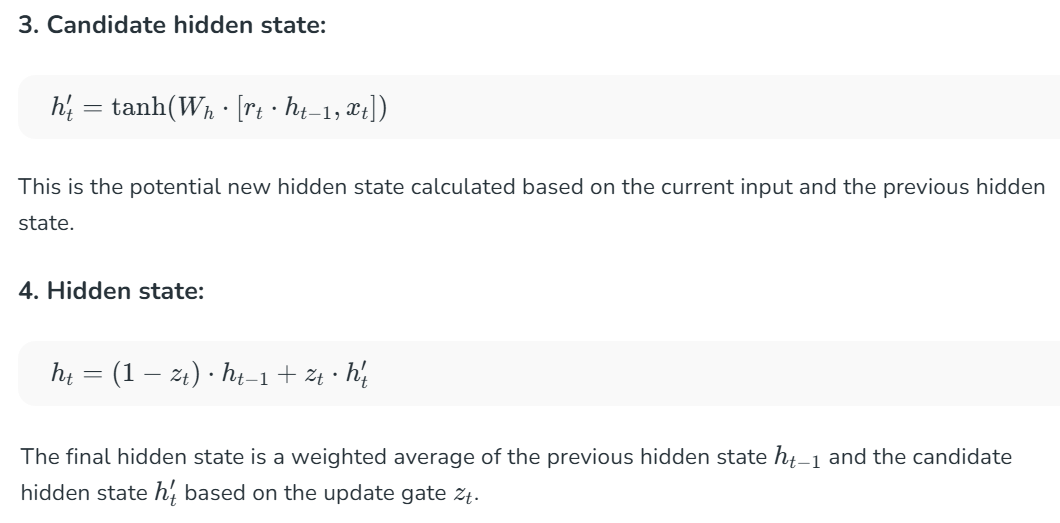

#### How GRUs Solve the Vanishing Gradient Problem

* Like LSTMs, GRUs were designed to address the vanishing gradient problem which is common in traditional RNNs. GRUs help mitigate this issue by using gates that regulate the flow of gradients during training ensuring that important information is preserved and that gradients do not shrink excessively over time. By using these gates, GRUs maintain a balance between remembering important past information and learning new, relevant data.

---

# Implementation in Python

### 1. Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam

### 2. Loading the Dataset

The dataset we're using is a time-series dataset containing daily temperature data i.e forecasting dataset. It spans 8,000 days starting from January 1, 2010.

* pd.read_csv(): Reads a CSV file into a pandas DataFrame. Here, we are assuming that the dataset has a Date column which is set as the index of the DataFrame.
* date_parser=True: Ensures that pandas parses the 'Date' column as datetime.

In [ ]:
df = pd.read_csv('data.csv', parse_dates=['Date'], index_col='Date')
print(df.head())

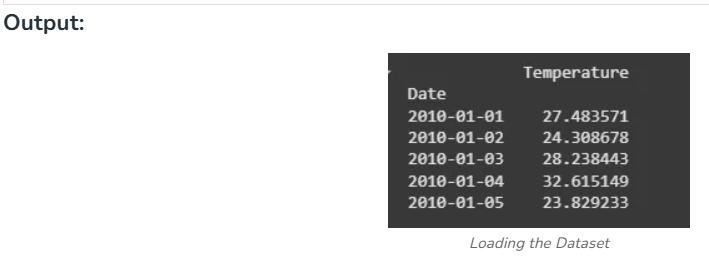

### 3. Preprocessing the Data
We will scale our data to ensure all features have equal weight and avoid any bias. In this example, we will use MinMaxScaler, which scales the data to a range between 0 and 1. Proper scaling is important because neural networks tend to perform better when input features are normalized.

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

### 4. Preparing Data for GRU
We will define a function to prepare our data for training our model.

* create_dataset(): Prepares the dataset for time-series forecasting. It creates sliding windows of time_step length to predict the next time step.
* X.reshape(): Reshapes the input data to fit the expected shape for the GRU which is 3D: [samples, time steps, features].

In [ ]:
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)


time_step = 100
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

### 5. Building the GRU Model
We will define our GRU model with the following components:

* GRU(units=50): Adds a GRU layer with 50 units (neurons).
* return_sequences=True: Ensures that the GRU layer returns the entire sequence (required for stacking multiple GRU layers).
* Dense(units=1): The output layer which predicts a single value for the next time step.
* Adam(): An adaptive optimizer commonly used in deep learning.

In [ ]:
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(GRU(units=50))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

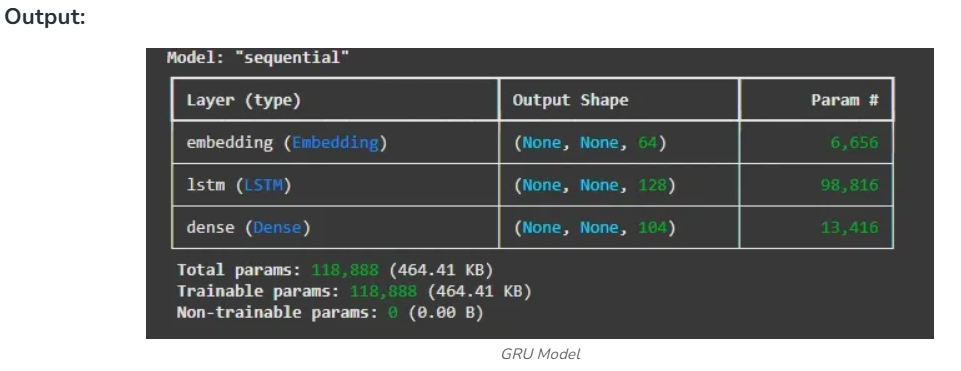

### 6. Training the Model
model.fit() trains the model on the prepared dataset. The epochs=10 specifies the number of iterations over the entire dataset, and batch_size=32 defines the number of samples per batch.

In [ ]:
model.fit(X, y, epochs=10, batch_size=32)

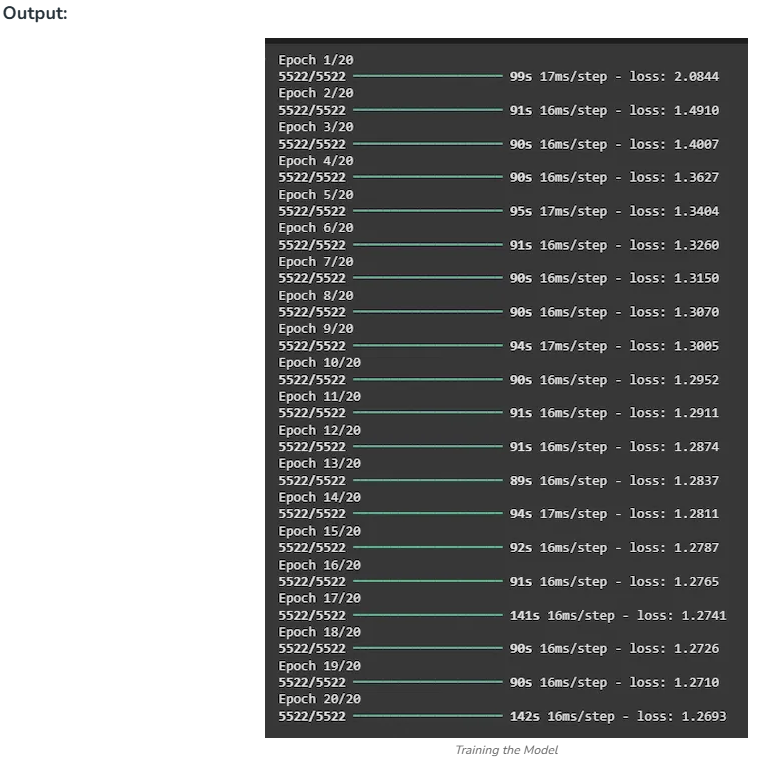

### 7. Making Predictions
We will be now making predictions using our trained GRU model.

* Input Sequence: The code takes the last 100 temperature values from the dataset (scaled_data[-time_step:]) as an input sequence.
* Reshaping the Input Sequence: The input sequence is reshaped into the shape (1, time_step, 1) because the GRU model expects a 3D input: [samples, time_steps, features]. Here samples=1 because we are making one prediction, time_steps=100 (the length of the input sequence) and features=1 because we are predicting only the temperature value.
* model.predict(): Uses the trained model to predict future values based on the input data.

In [ ]:
input_sequence = scaled_data[-time_step:].reshape(1, time_step, 1)
predicted_values = model.predict(input_sequence)

### 8. Inverse Transforming the Predictions
Inverse Transforming the Predictions refers to the process of converting the scaled (normalized) predictions back to their original scale.

* scaler.inverse_transform(): Converts the normalized predictions back to their original scale.

In [ ]:
predicted_values = scaler.inverse_transform(predicted_values)
print(
    f"The predicted temperature for the next day is: {predicted_values[0][0]:.2f}°C")

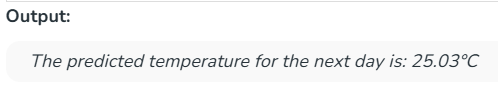

---

# **Comparison Table: RNN vs LSTM vs GRU**

| Feature                         | **RNN (Recurrent Neural Network)**  | **LSTM (Long Short-Term Memory)**                              | **GRU (Gated Recurrent Unit)**               |
| ------------------------------- | ----------------------------------- | -------------------------------------------------------------- | -------------------------------------------- |
| **Architecture**                | Simple recurrent cell               | Complex cell with 3 gates (input, forget, output) + cell state | Simplified LSTM with 2 gates (update, reset) |
| **Handles Vanishing Gradient?** | ❌ No                                | ✔ Yes                                                          | ✔ Yes                                        |
| **Memory Capability**           | Short-term                          | Long-term                                                      | Medium to long-term                          |
| **Speed (Training/Inference)**  | Fastest                             | Slowest (most parameters)                                      | Faster than LSTM, slower than RNN            |
| **Parameters**                  | Least                               | Most                                                           | Moderate                                     |
| **Best For**                    | Simple sequence tasks               | Long sequences, dependencies, NLP                              | Balanced tasks with speed + accuracy         |
| **Gates Used**                  | None                                | Input, Forget, Output                                          | Update, Reset                                |
| **Cell State**                  | No                                  | Yes (separate)                                                 | No (combined hidden state)                   |
| **Complexity**                  | Low                                 | High                                                           | Medium                                       |
| **Performance on NLP Tasks**    | Lowest                              | Highest                                                        | Close to LSTM but faster                     |
| **Memory Usage**                | Low                                 | High                                                           | Medium                                       |
| **Practical Use Cases**         | Basic time series, simple sequences | Machine translation, speech recognition, long text             | Chatbots, time series, mid-length text       |

---

## **Summary**

* **RNN**
  ✔ Simple & fast
  ❌ Fails on long-term dependencies

* **LSTM**
  ✔ Best accuracy, handles long sequences
  ❌ Slow, heavy, more parameters

* **GRU**
  ✔ Similar performance to LSTM
  ✔ Faster & fewer parameters
  ❌ Sometimes slightly worse than LSTM for very long sequences

---